# Bài báo cáo 2: Giải thuật Machine Learning 
- Sử dụng giải thuật K-means để phân nhóm các đặc trưng với giá nhà bất động sản.

- Sử dụng thuật toán Descision Tree (ID3) để tiến hành dự đoán giá nhà. 

## Khai báo thư viện:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import plotly.express as px

## Câu 1: Dữ liệu

### Giới thiệu sơ lược về bộ dữ liệu:

area: Diện tích đất ($m^{2}$)

link: Trang bán của sản phẩm

location: Địa điểm, vị trí

name: Tên bài bán

number_of_bathrooms: Số phòng tắm

number_of_bedrooms: Số phòng ngủ

price_per_metter: Giá nhà trên mỗi $m^{2}$ 

. Đọc file và hiển thị file dữ liệu:

In [2]:
df = pd.read_csv('data_bds.csv')
df

area                                               link  \
0      34.0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...   
1      97.0  https://meeyland.com//ban-nha-thanh-dam-long-l...   
2      63.0  https://meeyland.com//ban-nha-2-tang-kiet-o-to...   
3      33.0  https://meeyland.com//ban-nha-ngoc-thuy-long-b...   
4      30.0  https://meeyland.com//gap-ban-nha-hem-745-xe-o...   
...     ...                                                ...   
9995   71.0  https://meeyland.com//tong-quan-nha-nay-gom-4-...   
9996  104.0  https://meeyland.com//vi-tri-dat-o-trung-tam-l...   
9997  231.0  https://meeyland.com//ban-nha-o-dien-tich-gom-...   
9998  296.0  https://meeyland.com//nha-co-4-pn-ban-nha-o-co...   
9999  100.0  https://meeyland.com//co-dien-tich-100m2-ban-n...   

                     location  \
0            Cầu Giấy, Hà Nội   
1           Hoàng Mai, Hà Nội   
2         Liên Chiểu, Đà Nẵng   
3           Long Biên, Hà Nội   
4         Gò Vấp, Hồ Chí Minh   
...                       ...   
9995     Tân Phú, Hồ Chí Minh   
9996      Quận 9, Hồ Chí Minh   
9997  Bình Thạnh, Hồ Chí Minh   
9998      Quận 6, Hồ Chí Minh   
9999    Bình Tân, Hồ Chí Minh   

                                                   name  number_of_bathrooms  \
0     Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...                  NaN   
1     Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...                  NaN   
2     Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...                  3.0   
3                         Bán nhà Ngọc Thụy - Long Biên                  NaN   
4     Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...                  3.0   
...                                                 ...                  ...   
9995  Tổng quan nhà này gồm 4 phòng ngủ bán nhà bán ...                  5.0   
9996  Vị trí đặt ở trung tâm Long Trường, Hồ Chí Min...                  NaN   
9997  Bán nhà ở diện tích gồm 231m2 bán ngay với giá...                  NaN   
9998  Nhà có 4 PN bán nhà ở có diện tích chung là 29...                  4.0   
9999  Có diện tích 100m2 bán nhà nằm tại Bình Trị Đô...                  NaN   

      number_of_bedrooms price_per_metter  
0                    3.0     138,24 Tr/m²  
1                    4.0      126,8 Tr/m²  
2                    3.0      40,48 Tr/m²  
3                    NaN     118,18 Tr/m²  
4                    3.0     133,33 Tr/m²  
...                  ...              ...  
9995                 4.0      91,55 Tr/m²  
9996                 NaN       47,6 Tr/m²  
9997                 NaN      238,1 Tr/m²  
9998                 4.0      55,74 Tr/m²  
9999                 NaN        149 Tr/m²  

[10000 rows x 7 columns]

In [3]:
df.shape

(10000, 7)

. Xem thông tin về thuộc tính, thông số của bộ dữ liệu:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 10000 non-null  float64
 1   link                 10000 non-null  object 
 2   location             10000 non-null  object 
 3   name                 10000 non-null  object 
 4   number_of_bathrooms  6664 non-null   float64
 5   number_of_bedrooms   8079 non-null   float64
 6   price_per_metter     9405 non-null   object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


. Thống kê mô tả cơ bản dữ liệu của thuộc tính định lượng:

In [5]:
df.describe().T

count        mean         std  min   25%   50%   75%  \
area                 10000.0  116.569583  618.698485  4.0  42.0  58.0  85.0   
number_of_bathrooms   6664.0    3.935174    3.853617  1.0   2.0   3.0   4.0   
number_of_bedrooms    8079.0    4.101993    3.688609  1.0   3.0   3.0   4.0   

                         max  
area                 37600.0  
number_of_bathrooms    110.0  
number_of_bedrooms     110.0

. Thống kê mô tả cơ bản dữ liệu của thuộc tính định tính:

In [6]:
df[['link', 'location', 'name', 'price_per_metter']].describe().T

count unique  \
link              10000   9877   
location          10000    165   
name              10000   9855   
price_per_metter   9405   4630   

                                                                top freq  
link              https://meeyland.com//mat-tien-nam-o-binh-an-h...    2  
location                                            Đống Đa, Hà Nội  701  
name                                  Bán nhà Ngọc Thụy - Long Biên    3  
price_per_metter                                          100 Tr/m²  124

### Tiền xử lý (Missing value - Outlier):

- Loai bỏ các chữ có trong giá mỗi mét:

In [7]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Tr/m²', '').str.strip()

In [8]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Tỷ/m²', '').str.strip()

In [9]:
df['price_per_metter'] = df['price_per_metter'].str.replace('Ng/m²', '').str.strip()

In [10]:
df['price_per_metter'].head()

0    138,24
1     126,8
2     40,48
3    118,18
4    133,33
Name: price_per_metter, dtype: object

- Thay đổi dấu "," trong số thành ".":

In [11]:
df['price_per_metter'] = df['price_per_metter'].str.replace(',', '.').str.strip()

In [12]:
df['price_per_metter'].head()

0    138.24
1     126.8
2     40.48
3    118.18
4    133.33
Name: price_per_metter, dtype: object

- Chuyển đổi kiểu dữ liệu của cột giá trên mét này từ Object sang Float:

In [13]:
df['price_per_metter'] = pd.to_numeric(df['price_per_metter'], errors='coerce')

In [14]:
df.dtypes

area                   float64
link                    object
location                object
name                    object
number_of_bathrooms    float64
number_of_bedrooms     float64
price_per_metter       float64
dtype: object

- Tạo cột giá từ cột khu vực sau khi nhân với giá trên mỗi mét:

In [15]:
df['price'] = df['area'] * df['price_per_metter']

In [16]:
df

area                                               link  \
0      34.0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...   
1      97.0  https://meeyland.com//ban-nha-thanh-dam-long-l...   
2      63.0  https://meeyland.com//ban-nha-2-tang-kiet-o-to...   
3      33.0  https://meeyland.com//ban-nha-ngoc-thuy-long-b...   
4      30.0  https://meeyland.com//gap-ban-nha-hem-745-xe-o...   
...     ...                                                ...   
9995   71.0  https://meeyland.com//tong-quan-nha-nay-gom-4-...   
9996  104.0  https://meeyland.com//vi-tri-dat-o-trung-tam-l...   
9997  231.0  https://meeyland.com//ban-nha-o-dien-tich-gom-...   
9998  296.0  https://meeyland.com//nha-co-4-pn-ban-nha-o-co...   
9999  100.0  https://meeyland.com//co-dien-tich-100m2-ban-n...   

                     location  \
0            Cầu Giấy, Hà Nội   
1           Hoàng Mai, Hà Nội   
2         Liên Chiểu, Đà Nẵng   
3           Long Biên, Hà Nội   
4         Gò Vấp, Hồ Chí Minh   
...                       ...   
9995     Tân Phú, Hồ Chí Minh   
9996      Quận 9, Hồ Chí Minh   
9997  Bình Thạnh, Hồ Chí Minh   
9998      Quận 6, Hồ Chí Minh   
9999    Bình Tân, Hồ Chí Minh   

                                                   name  number_of_bathrooms  \
0     Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...                  NaN   
1     Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...                  NaN   
2     Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...                  3.0   
3                         Bán nhà Ngọc Thụy - Long Biên                  NaN   
4     Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...                  3.0   
...                                                 ...                  ...   
9995  Tổng quan nhà này gồm 4 phòng ngủ bán nhà bán ...                  5.0   
9996  Vị trí đặt ở trung tâm Long Trường, Hồ Chí Min...                  NaN   
9997  Bán nhà ở diện tích gồm 231m2 bán ngay với giá...                  NaN   
9998  Nhà có 4 PN bán nhà ở có diện tích chung là 29...                  4.0   
9999  Có diện tích 100m2 bán nhà nằm tại Bình Trị Đô...                  NaN   

      number_of_bedrooms  price_per_metter     price  
0                    3.0            138.24   4700.16  
1                    4.0            126.80  12299.60  
2                    3.0             40.48   2550.24  
3                    NaN            118.18   3899.94  
4                    3.0            133.33   3999.90  
...                  ...               ...       ...  
9995                 4.0             91.55   6500.05  
9996                 NaN             47.60   4950.40  
9997                 NaN            238.10  55001.10  
9998                 4.0             55.74  16499.04  
9999                 NaN            149.00  14900.00  

[10000 rows x 8 columns]

- Kiểm tra dữ liệu bị thiếu:

In [17]:
df.isnull().sum()

area                      0
link                      0
location                  0
name                      0
number_of_bathrooms    3336
number_of_bedrooms     1921
price_per_metter        596
price                   596
dtype: int64

- Vẽ biểu đồ nhiệt xem các giá trị bị thiếu:

<Axes: >

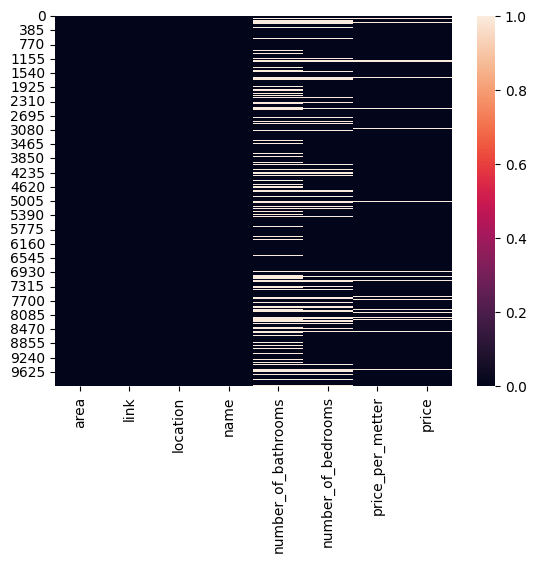

In [18]:
sns.heatmap(df.isnull())

- Kiểm tra xem % các biến bị thiếu dữ liệu:

In [19]:
(df.isnull().sum()/len(df))*100

area                    0.00
link                    0.00
location                0.00
name                    0.00
number_of_bathrooms    33.36
number_of_bedrooms     19.21
price_per_metter        5.96
price                   5.96
dtype: float64

- Chuyển đổi kiểu dữ liệu của cột "number_of_bedrooms" và "number_of_bathrooms" trong DataFrame df từ kiểu dữ liệu hiện tại sang kiểu dữ liệu số (number):

In [20]:
df.number_of_bedrooms = df.number_of_bedrooms.astype(np.number)
df.number_of_bathrooms = df.number_of_bathrooms.astype(np.number)

In [21]:
df.isnull().sum()   

area                      0
link                      0
location                  0
name                      0
number_of_bathrooms    3336
number_of_bedrooms     1921
price_per_metter        596
price                   596
dtype: int64

- Khởi tạo biến lưu trữ các giá trị category:

In [22]:
df_cat = df.select_dtypes(object)
df_cat.head()

link             location  \
0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...     Cầu Giấy, Hà Nội   
1  https://meeyland.com//ban-nha-thanh-dam-long-l...    Hoàng Mai, Hà Nội   
2  https://meeyland.com//ban-nha-2-tang-kiet-o-to...  Liên Chiểu, Đà Nẵng   
3  https://meeyland.com//ban-nha-ngoc-thuy-long-b...    Long Biên, Hà Nội   
4  https://meeyland.com//gap-ban-nha-hem-745-xe-o...  Gò Vấp, Hồ Chí Minh   

                                                name  
0  Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...  
1  Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...  
2  Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...  
3                      Bán nhà Ngọc Thụy - Long Biên  
4  Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...

- Khởi tạo biến lưu trữ giá trị số:

In [23]:
df_num = df.select_dtypes(np.number)
df_num.head()

area  number_of_bathrooms  number_of_bedrooms  price_per_metter     price
0  34.0                  NaN                 3.0            138.24   4700.16
1  97.0                  NaN                 4.0            126.80  12299.60
2  63.0                  3.0                 3.0             40.48   2550.24
3  33.0                  NaN                 NaN            118.18   3899.94
4  30.0                  3.0                 3.0            133.33   3999.90

- Sử dụng KNNImputer() để dự đoán và điền giá trị thiếu vào dữ liệu trong việc xử lý giá thị thiếu.

In [24]:
imputer = KNNImputer()

imputer.fit(df_num)

df_num_impute = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns)

In [25]:
df = pd.concat([df_cat, df_num_impute], axis=1)

- Sau khi xử lý xong, vẽ biểu đồ nhiệt để kiểm tra lại xem còn giá trị nào thiếu không:

<Axes: >

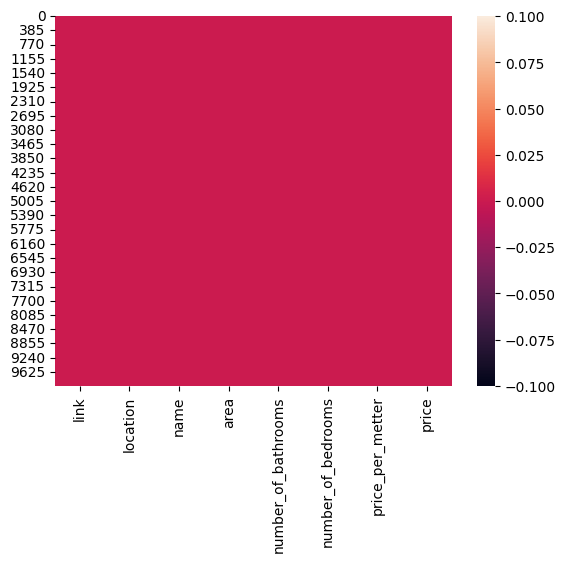

In [26]:
sns.heatmap(df.isnull())

In [27]:
(df.isnull().sum()/len(df))*100

link                   0.0
location               0.0
name                   0.0
area                   0.0
number_of_bathrooms    0.0
number_of_bedrooms     0.0
price_per_metter       0.0
price                  0.0
dtype: float64

- Tiếp đến, sử dụng boxplot() kiểm tra xem có giá trị ngoại lệ nào hiện đang trong bộ dữ liệu:

<Axes: >

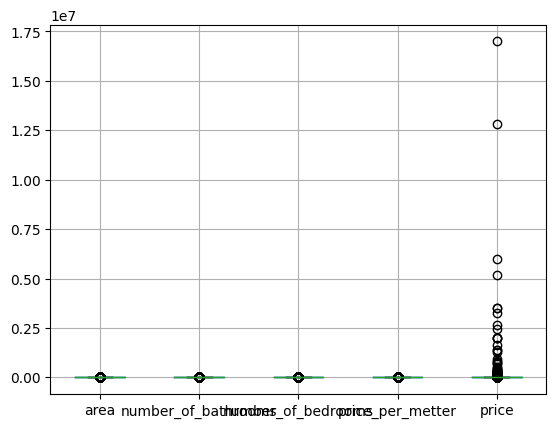

In [28]:
df.boxplot()

- Ta thấy rằng ở cột 'price' xuất hiện nhiều các giá trị ngoại lệ, vì thế ta sẽ tính toán q1, q3 và IQR để tiến hành xử lý, xóa đi những giá trị này:

In [29]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9328\2347966237.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_9328\2347966237.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_9328\2347966237.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]


link             location  \
0  https://meeyland.com//cuc-pham-cau-giay-vo-chi...     Cầu Giấy, Hà Nội   
1  https://meeyland.com//ban-nha-thanh-dam-long-l...    Hoàng Mai, Hà Nội   
2  https://meeyland.com//ban-nha-2-tang-kiet-o-to...  Liên Chiểu, Đà Nẵng   
3  https://meeyland.com//ban-nha-ngoc-thuy-long-b...    Long Biên, Hà Nội   
4  https://meeyland.com//gap-ban-nha-hem-745-xe-o...  Gò Vấp, Hồ Chí Minh   

                                                name  area  \
0  Cực phẩm Cầu Giấy, Võ Chí Công full nội thất 3...  34.0   
1  Bán nhà Thanh Đàm long lanh ở ngay ô tô dừng đ...  97.0   
2  Bán nhà 2 tầng kiệt Ô TÔ K382 Tôn Đức Thắng, H...  63.0   
3                      Bán nhà Ngọc Thụy - Long Biên  33.0   
4  Gấp bán nhà hẻm 745 xe o to đổ cửa Quang Trung...  30.0   

   number_of_bathrooms  number_of_bedrooms  price_per_metter     price  
0                  3.0                 3.0            138.24   4700.16  
1                  3.2                 4.0            126.80  12299.60  
2                  3.0                 3.0             40.48   2550.24  
3                  3.2                 3.8            118.18   3899.94  
4                  3.0                 3.0            133.33   3999.90

- Kiểm tra lại bộ dữ liệu sau khi xử lý:

<Axes: >

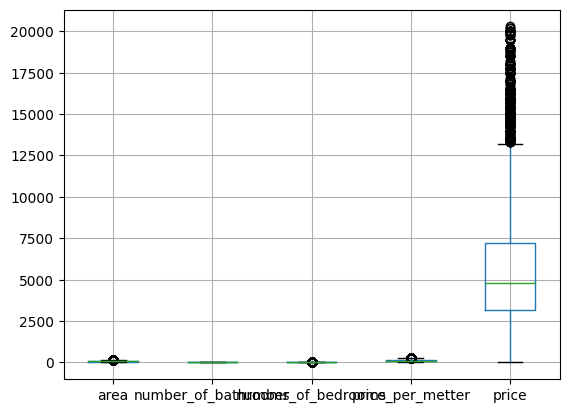

In [30]:
df.boxplot()

In [31]:
df.shape

(7803, 8)

### Khám phá dữ liệu - Trực quan hóa dữ liệu:

In [32]:
df['location'].value_counts()

Đống Đa, Hà Nội          522
Long Biên, Hà Nội        461
Gò Vấp, Hồ Chí Minh      439
Bình Tân, Hồ Chí Minh    378
Tân Phú, Hồ Chí Minh     340
                        ... 
Lạng Sơn, Lạng Sơn         1
Quảng Yên, Quảng Ninh      1
Bảo Lộc, Lâm Đồng          1
Chợ Mới, An Giang          1
Tam Dương, Vĩnh Phúc       1
Name: location, Length: 129, dtype: int64

In [33]:
px.histogram(df, x='location', color='location', title='Biểu đồ thể hiện số lượt bán nhà theo khu vực')

- Vẽ biểu đồ thể hiện giá nhà theo từng khu vực/ địa điểm:

In [34]:
px.bar(df, x='location', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo khu vực')

- Vẽ biểu đồ scatter thể hiện mối tương quan giữa diện tích nhà đất với giá trên một mét vuông đất:

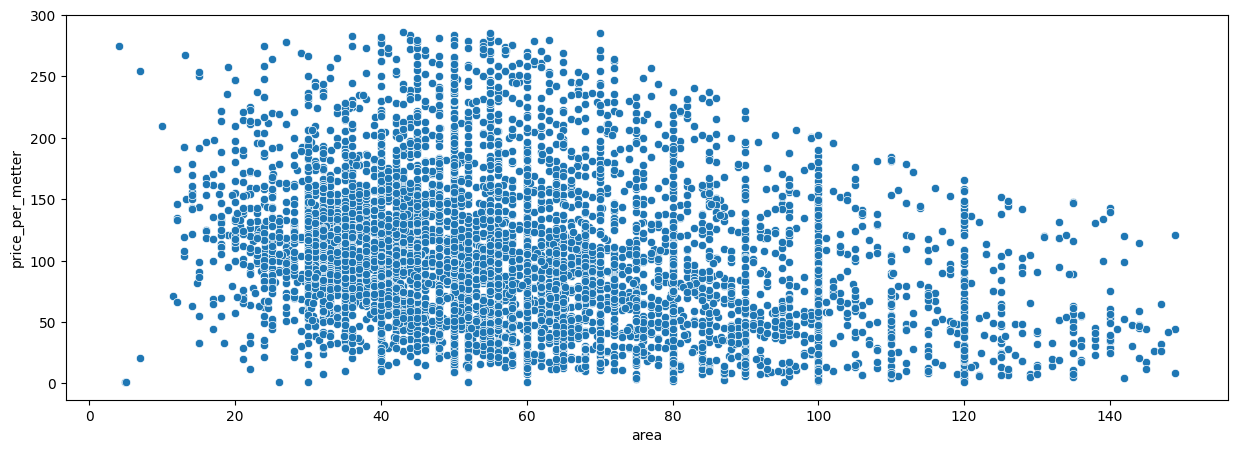

In [35]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="area", y="price_per_metter", data=df)
plt.show()

- Vẽ biểu đồ thể hiện top những nhà có giá nhà trung bình cao cùng số lượng phòng ngủ:

Text(0.5, 0, 'Số lượng phòng ngủ')

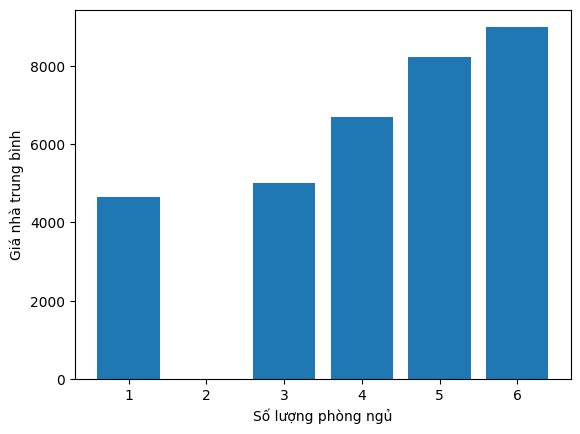

In [36]:
df_bed = df.copy()
df_bed['number_of_bedrooms'] = np.round(df_bed['number_of_bedrooms'])
plt.bar(x=df_bed.groupby('number_of_bedrooms')['price'].agg('mean').sort_values(ascending=False).head().index,height=df_bed.groupby('number_of_bedrooms')['price'].agg('mean').sort_values(ascending=False).head())
plt.ylabel('Giá nhà trung bình')
plt.xlabel('Số lượng phòng ngủ')

- Biểu đồ thể hiện số lượng phòng ngủ:

<Axes: xlabel='number_of_bedrooms', ylabel='Count'>

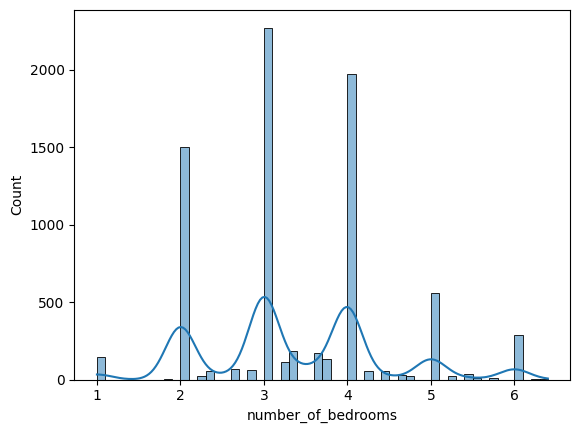

In [37]:
sns.histplot(df['number_of_bedrooms'], kde=True)

- Biểu đồ biểu hiện số lượng phòng tắm:

<Axes: xlabel='number_of_bathrooms', ylabel='Count'>

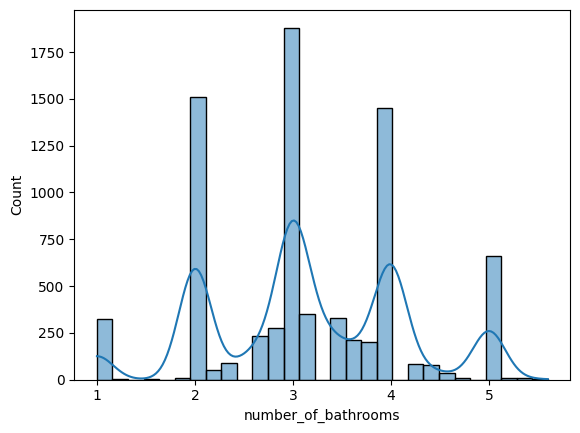

In [38]:
sns.histplot(df['number_of_bathrooms'], kde=True)

- Vẽ biểu đồ thể hiện tổng giá nhà theo từng khu vực (location):

In [39]:
px.histogram(df, x='price', y='location', title='Biểu đồ thể hiện tổng giá nhà theo khu vực')

- Top 10 các khu vực có giá nhà trung bình cao nhất:

In [40]:
df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10)

location
Tam Dương, Vĩnh Phúc        18750.312000
Quảng Yên, Quảng Ninh       17700.120000
Phủ Lý, Hà Nam              14000.400000
Sa Pa, Lào Cai              13900.082500
Tuy Hòa, Phú Yên            11000.400000
Hạ Long, Quảng Ninh         10755.758560
Quy Nhơn, Bình Định         10625.347500
Thái Nguyên, Thái Nguyên    10165.774680
Quận 2, Hồ Chí Minh         10028.323391
Phú Quốc, Kiên Giang         8334.915000
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tam Dương, Vĩnh Phúc'),
  Text(1, 0, 'Quảng Yên, Quảng Ninh'),
  Text(2, 0, 'Phủ Lý, Hà Nam'),
  Text(3, 0, 'Sa Pa, Lào Cai'),
  Text(4, 0, 'Tuy Hòa, Phú Yên'),
  Text(5, 0, 'Hạ Long, Quảng Ninh'),
  Text(6, 0, 'Quy Nhơn, Bình Định'),
  Text(7, 0, 'Thái Nguyên, Thái Nguyên'),
  Text(8, 0, 'Quận 2, Hồ Chí Minh'),
  Text(9, 0, 'Phú Quốc, Kiên Giang')])

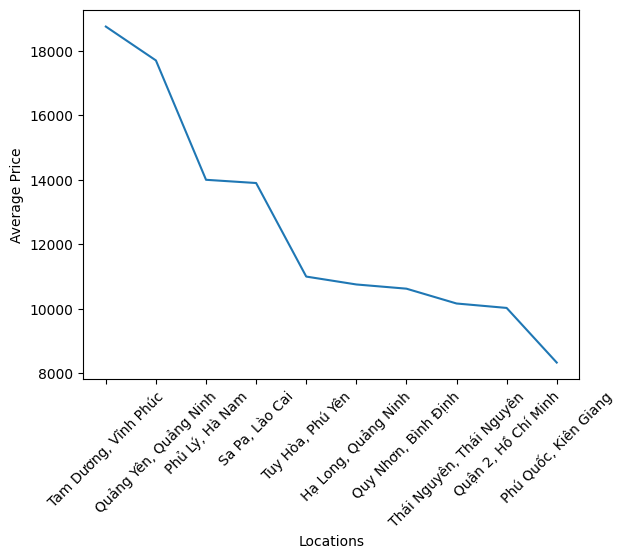

In [41]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

- Top 10 khu vực có giá nhà trung bình thấp nhất:

In [42]:
df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).tail(10)

location
Châu Thành, Kiên Giang    1000.000
Châu Thành, Bến Tre        979.435
Bảo Lộc, Lâm Đồng          899.650
Bảo Lâm, Lâm Đồng          880.000
Chơn Thành, Bình Phước     849.160
Cần Đước, Long An          814.335
Hòa Thành, Tây Ninh        750.120
Tây Ninh, Tây Ninh         684.840
Bình Minh, Vĩnh Long       619.880
Phụng Hiệp, Hậu Giang      150.400
Name: price, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Châu Thành, Kiên Giang'),
  Text(1, 0, 'Châu Thành, Bến Tre'),
  Text(2, 0, 'Bảo Lộc, Lâm Đồng'),
  Text(3, 0, 'Bảo Lâm, Lâm Đồng'),
  Text(4, 0, 'Chơn Thành, Bình Phước'),
  Text(5, 0, 'Cần Đước, Long An'),
  Text(6, 0, 'Hòa Thành, Tây Ninh'),
  Text(7, 0, 'Tây Ninh, Tây Ninh'),
  Text(8, 0, 'Bình Minh, Vĩnh Long'),
  Text(9, 0, 'Phụng Hiệp, Hậu Giang')])

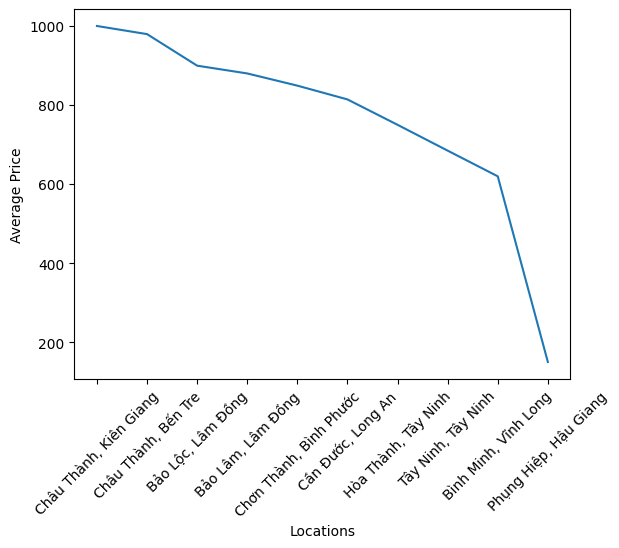

In [43]:
plt.plot(df.groupby(by='location')['price'].agg('mean').sort_values(ascending=False).tail(10))
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

- Top 10 khu vực có giá nhà trung bình trên mỗi mét vuông cao nhất:

Text(0, 0.5, 'Average Price Per Metter')

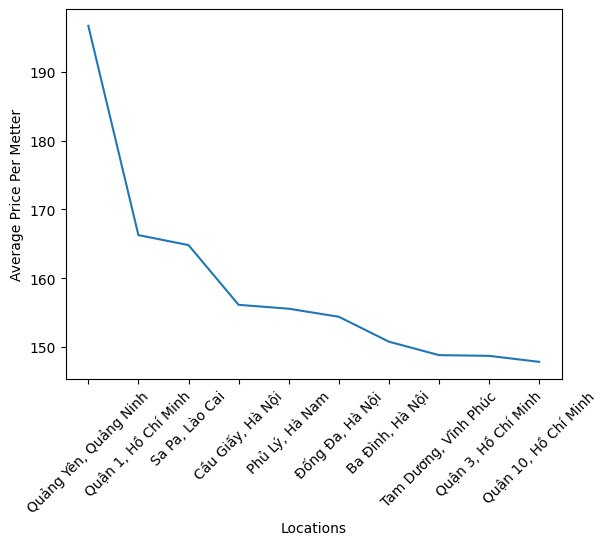

In [44]:
plt.plot(df.groupby(by='location')['price_per_metter'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Price Per Metter')

- Top 10 khu vực có giá nhà trung bình trên mỗi mét vuông thấp nhất:

Text(0, 0.5, 'Average Price Per Metter')

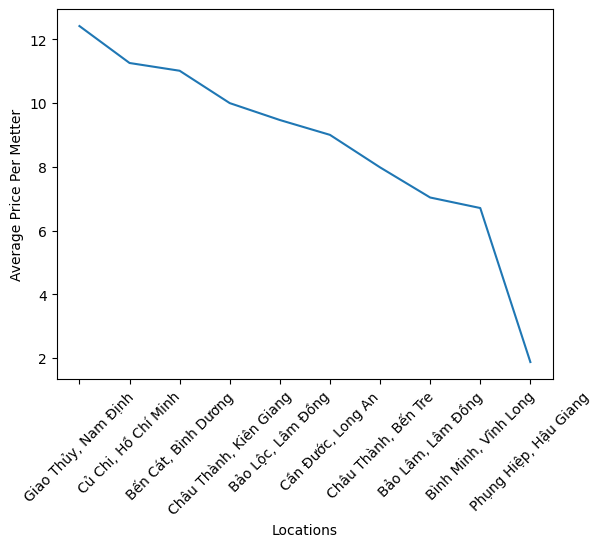

In [45]:
plt.plot(df.groupby(by='location')['price_per_metter'].agg('mean').sort_values(ascending=False).tail(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Price Per Metter')

- Top 10 các khu vực có diện tích đất cao nhất:

Text(0, 0.5, 'Average Area')

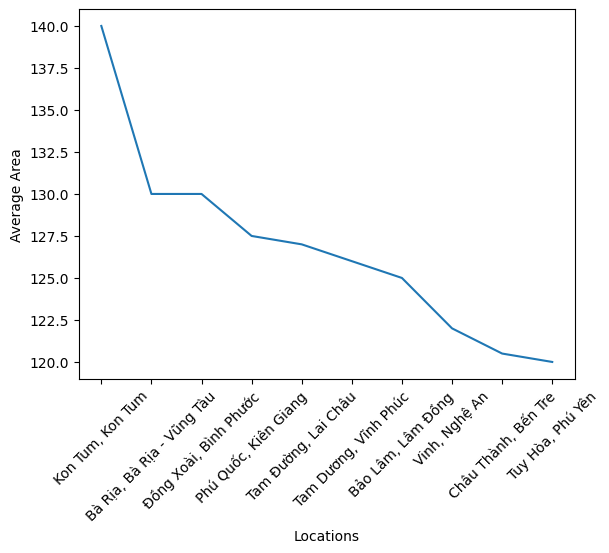

In [46]:
plt.plot(df.groupby(by='location')['area'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Area')

- Top 10 các khu vực có diện tích đất thấp nhất:

Text(0, 0.5, 'Average Area')

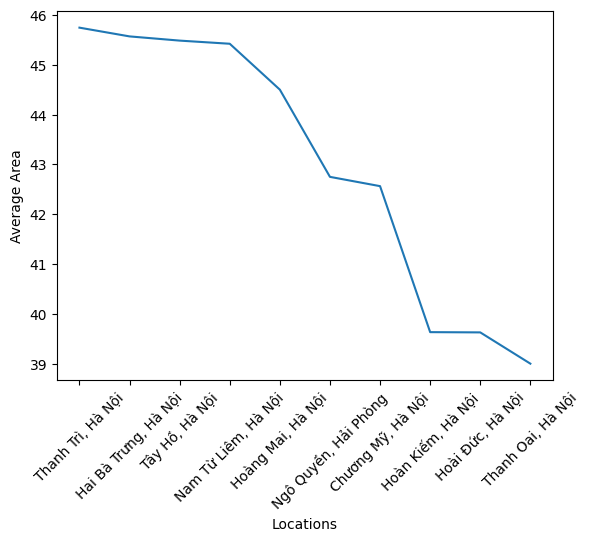

In [47]:
plt.plot(df.groupby(by='location')['area'].agg('mean').sort_values(ascending=False).tail(10))
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Average Area')

- Vẽ biểu đồ tương quan thể hiện giá nhà theo diện tích từng khu vực:

In [48]:
px.scatter(df, x='area', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo diện tích')

- Vẽ biểu đồ scatter thể hiện giá nhà theo giá nhà trên mỗi mét vuông ở từng khu vực:

In [49]:
px.scatter(df, x='price_per_metter', y='price', color='location', title='Biểu đồ thể hiện giá nhà theo giá nhà trên mỗi mét vuông ở từng khu vực')

In [50]:
df = df.drop(['link', 'name'], axis=1)

In [51]:
df

location   area  number_of_bathrooms  number_of_bedrooms  \
0            Cầu Giấy, Hà Nội   34.0                  3.0                 3.0   
1           Hoàng Mai, Hà Nội   97.0                  3.2                 4.0   
2         Liên Chiểu, Đà Nẵng   63.0                  3.0                 3.0   
3           Long Biên, Hà Nội   33.0                  3.2                 3.8   
4         Gò Vấp, Hồ Chí Minh   30.0                  3.0                 3.0   
...                       ...    ...                  ...                 ...   
9991          Hà Đông, Hà Nội   35.0                  3.8                 3.2   
9993  Bình Thạnh, Hồ Chí Minh   73.7                  3.0                 3.0   
9995     Tân Phú, Hồ Chí Minh   71.0                  5.0                 4.0   
9996      Quận 9, Hồ Chí Minh  104.0                  3.0                 3.6   
9999    Bình Tân, Hồ Chí Minh  100.0                  2.8                 3.4   

      price_per_metter      price  
0               138.24   4700.160  
1               126.80  12299.600  
2                40.48   2550.240  
3               118.18   3899.940  
4               133.33   3999.900  
...                ...        ...  
9991            177.14   6199.900  
9993             43.28   3189.736  
9995             91.55   6500.050  
9996             47.60   4950.400  
9999            149.00  14900.000  

[7803 rows x 6 columns]

- Tiếp theo, ta sẽ tiến hành vẽ biểu đồ heatmap để xem mức độ tương quan giữa các thuộc tính định lượng trong bộ dữ liệu:

C:\Users\USER\AppData\Local\Temp\ipykernel_9328\3541585420.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



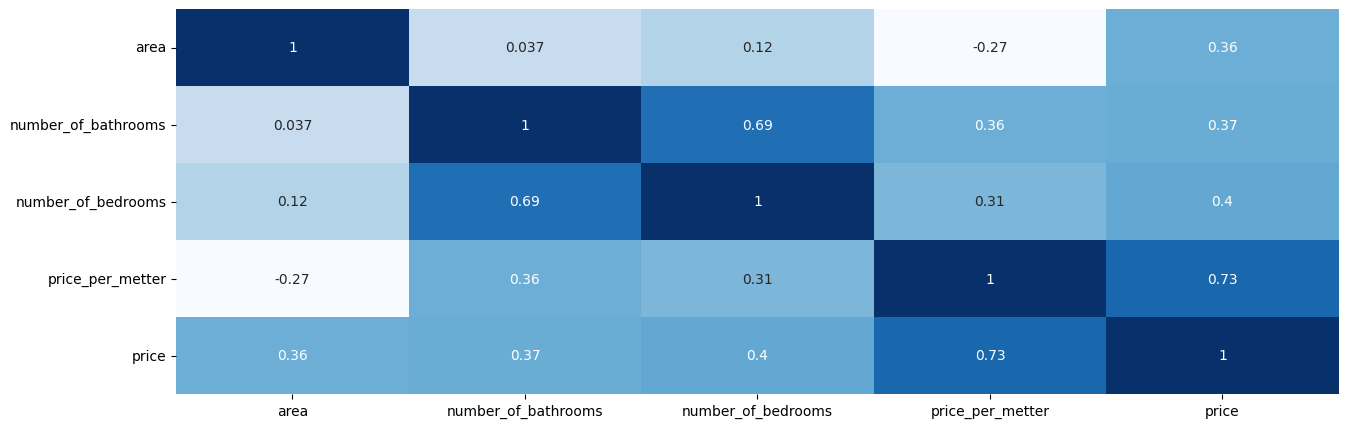

In [52]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Blues')
plt.show()

### Cuối cùng, ta đến bước chuẩn hóa (chia tập dữ liệu thành train - test để tiến hành mô hình hóa dữ liệu):

In [53]:
df.head()

location  area  number_of_bathrooms  number_of_bedrooms  \
0     Cầu Giấy, Hà Nội  34.0                  3.0                 3.0   
1    Hoàng Mai, Hà Nội  97.0                  3.2                 4.0   
2  Liên Chiểu, Đà Nẵng  63.0                  3.0                 3.0   
3    Long Biên, Hà Nội  33.0                  3.2                 3.8   
4  Gò Vấp, Hồ Chí Minh  30.0                  3.0                 3.0   

   price_per_metter     price  
0            138.24   4700.16  
1            126.80  12299.60  
2             40.48   2550.24  
3            118.18   3899.94  
4            133.33   3999.90

- Sử dụng phương thức get_dummies của pandas để mã hóa biến phân loại "location" thành các cột dummies (one-hot encoding) và kết hợp chúng với DataFrame gốc.

In [54]:
data_encoded_refernce = pd.get_dummies(df1, columns=['location'])
data_encoded_refernce.head()

area  number_of_bathrooms  number_of_bedrooms  price_per_metter     price  \
0  34.0                  3.0                 3.0            138.24   4700.16   
1  97.0                  3.2                 4.0            126.80  12299.60   
2  63.0                  3.0                 3.0             40.48   2550.24   
3  33.0                  3.2                 3.8            118.18   3899.94   
4  30.0                  3.0                 3.0            133.33   3999.90   

   location_An Dương, Hải Phòng  location_Ba Đình, Hà Nội  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   location_Biên Hòa, Đồng Nai  location_Buôn Ma Thuột, Đắk Lắk  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   location_Bà Rịa, Bà Rịa - Vũng Tàu  ...  \
0                                   0  ...   
1                                   0  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   

   location_Vũng Tàu, Bà Rịa - Vũng Tàu  location_Vị Thanh, Hậu Giang  \
0                                     0                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   

   location_Ý Yên, Nam Định  location_Điện Bàn, Quảng Nam  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   location_Đà Lạt, Lâm Đồng  location_Đông Anh, Hà Nội  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   location_Đống Đa, Hà Nội  location_Đồng Xoài, Bình Phước  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   location_Đức Hòa, Long An  location_Đức Trọng, Lâm Đồng  
0                          0                             0  
1                          0                             0  
2                          0                             0  
3                          0                             0  
4                          0                             0  

[5 rows x 134 columns]

- Chuẩn hóa xong dữ liệu, ta tiến thành phân chia tập train, test bắt đầu thực hiện phân tích dữ liệu:

In [55]:
test_size = int(0.2 * len(df))

# Tạo tập test bằng cách lấy ngẫu nhiên các mẫu
test_indices = data_encoded_refernce.sample(test_size, random_state=42).index
test_df = data_encoded_refernce.loc[test_indices]

# Tạo tập train bằng cách loại bỏ các mẫu của tập test
train_df = data_encoded_refernce.drop(test_indices)

# Kiểm tra kích thước của tập train và tập test
print("Kích thước tập train:", train_df.shape)
print("Kích thước tập test:", test_df.shape)

Kích thước tập train: (6243, 134)
Kích thước tập test: (1560, 134)


## Câu 2: Mô hình

- Xây dựng kiến trúc mạng (không dùng thư viện model)

- Huấn luyện mô hình

- Vẽ biểu đồ đánh giá, bảng so sánh

- Tinh chỉnh lại mô hình (2, 3 cái)

### Về giải thuật K-means trong việc phân nhóm các đặc trưng với giá nhà bất động sản:
- Trước tiên, định nghĩa các hàm sử dụng trong giải thuật K-means:

In [56]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1], label=f'Cluster {k}', s=30, alpha=0.8)

    plt.scatter(centers[-1][:, 0], centers[-1][:, 1], marker='X', color='red', s=250, label='Centroids')
    plt.legend()
    plt.title('K-means Clustering')
    plt.show()

def elbow_k(X, max_k):
    inertias = []  # Danh sách lưu giá trị quán tính

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Vẽ biểu đồ quán tính
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('Quán tính')
    plt.title('Phương pháp Elbow để chọn số lượng cụm tối ưu')
    plt.show()

    return inertias

- Sử dụng phương pháp Elbow để chọn số cụm tối ưu:

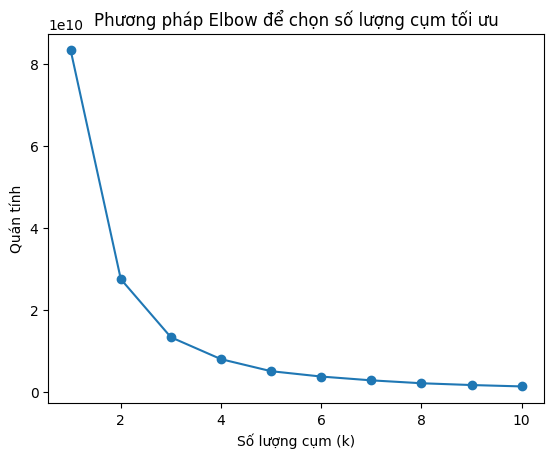

In [57]:
max_itr = 10
interation = elbow_k(train_df[['area', 'price']].values, max_itr)

Centers được tìm thấy sau 11 lần lặp:
[[   72.77836457 11899.12768118]
 [   53.22096074  4247.58451018]]


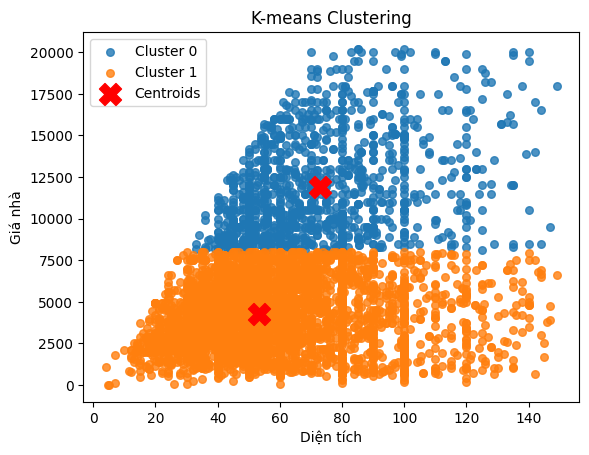

In [58]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['area', 'price']].values, labels[-1])

Centers được tìm thấy sau 19 lần lặp:
[[   60.22748797  6965.32672016]
 [   77.03601637 13588.970197  ]
 [   50.58238054  3224.33499443]]


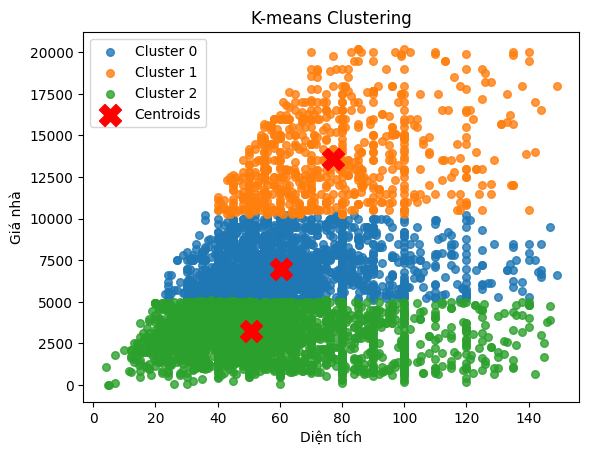

In [59]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['area', 'price']].values, labels[-1])

. Phân nhóm đặc trưng price_per_metter với giá nhà mục tiêu:

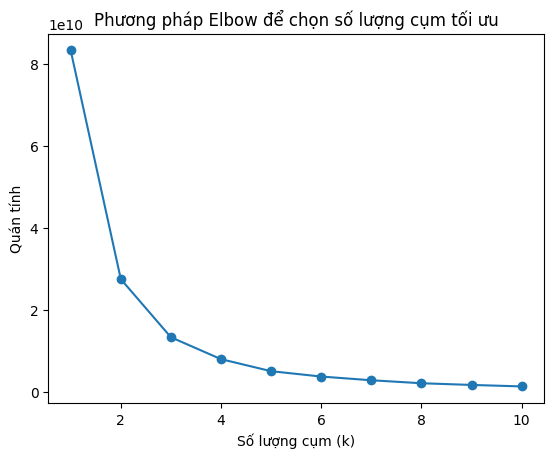

In [60]:
interation = elbow_k(train_df[['price_per_metter', 'price']].values, max_itr)

Centers được tìm thấy sau 13 lần lặp:
[[  173.88225213 11899.12768118]
 [   90.80879306  4247.58451018]]


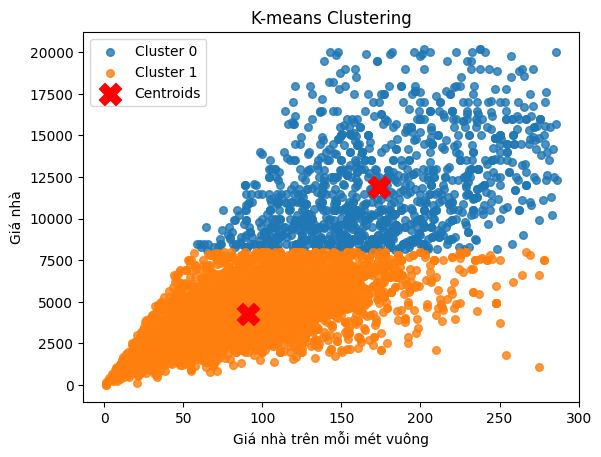

In [61]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Giá nhà trên mỗi mét vuông')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['price_per_metter', 'price']].values, labels[-1])

Centers được tìm thấy sau 18 lần lặp:
[[  187.6908513  13588.970197  ]
 [   76.59769697  3224.33499443]
 [  127.03890568  6965.32672016]]


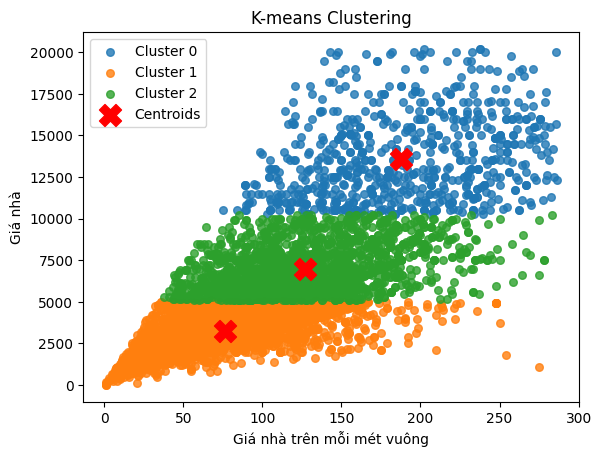

In [62]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Giá nhà trên mỗi mét vuông')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['price_per_metter', 'price']].values, labels[-1])

. Phân nhóm đặc trưng phòng ngủ với giá nhà mục tiêu:

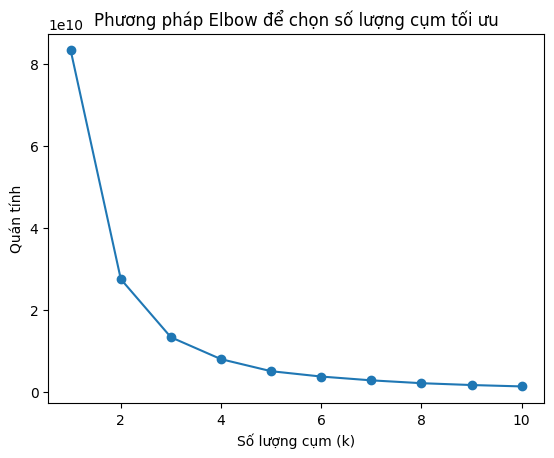

In [63]:
interation = elbow_k(train_df[['number_of_bedrooms', 'price']].values, max_itr)

Centers được tìm thấy sau 10 lần lặp:
[[3.22126652e+00 4.24758451e+03]
 [3.96524702e+00 1.18991277e+04]]


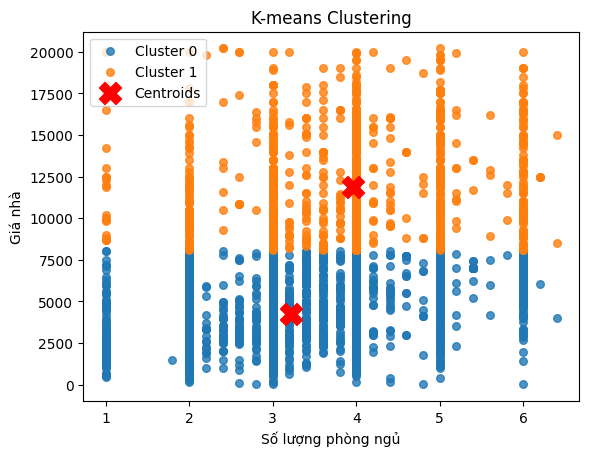

In [64]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['number_of_bedrooms', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng ngủ')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['number_of_bedrooms', 'price']].values, labels[-1])

. Phân nhóm đặc trưng phòng tắm với giá nhà:

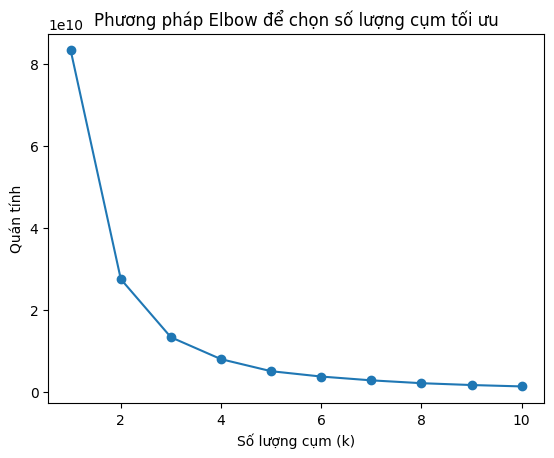

In [65]:
interation = elbow_k(train_df[['number_of_bathrooms', 'price']].values, max_itr)

Centers được tìm thấy sau 9 lần lặp:
[[3.03801262e+00 4.24984895e+03]
 [3.63415884e+00 1.19089222e+04]]


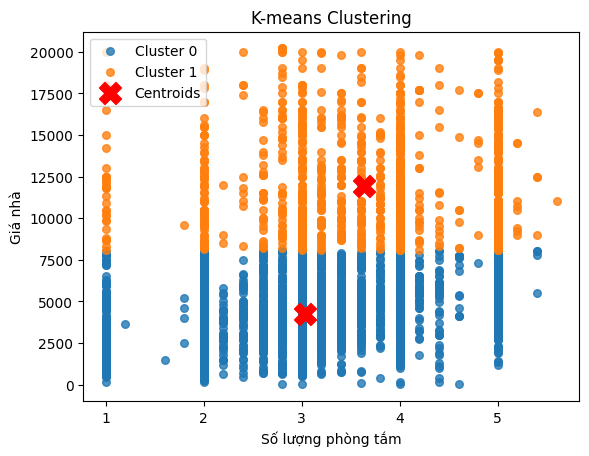

In [66]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['number_of_bathrooms', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['number_of_bathrooms', 'price']].values, labels[-1])

. Phân nhóm khu vực với giá nhà:

In [67]:
train_df.columns

Index(['area', 'number_of_bathrooms', 'number_of_bedrooms', 'price_per_metter',
       'price', 'location_An Dương, Hải Phòng', 'location_Ba Đình, Hà Nội',
       'location_Biên Hòa, Đồng Nai', 'location_Buôn Ma Thuột, Đắk Lắk',
       'location_Bà Rịa, Bà Rịa - Vũng Tàu',
       ...
       'location_Vũng Tàu, Bà Rịa - Vũng Tàu', 'location_Vị Thanh, Hậu Giang',
       'location_Ý Yên, Nam Định', 'location_Điện Bàn, Quảng Nam',
       'location_Đà Lạt, Lâm Đồng', 'location_Đông Anh, Hà Nội',
       'location_Đống Đa, Hà Nội', 'location_Đồng Xoài, Bình Phước',
       'location_Đức Hòa, Long An', 'location_Đức Trọng, Lâm Đồng'],
      dtype='object', length=134)

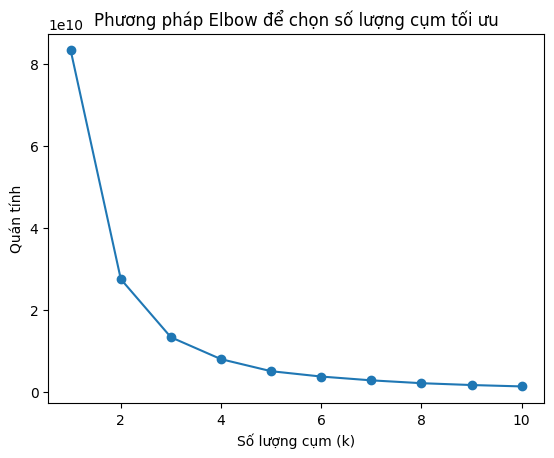

In [68]:
interation = elbow_k(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, max_itr)

Centers được tìm thấy sau 8 lần lặp:
[[2.55536627e-03 1.18991277e+04]
 [1.49930953e-02 4.24758451e+03]]


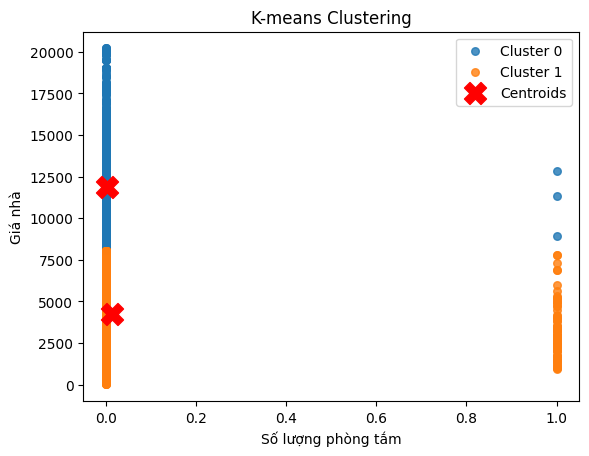

In [69]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['location_Biên Hòa, Đồng Nai', 'price']].values, labels[-1])

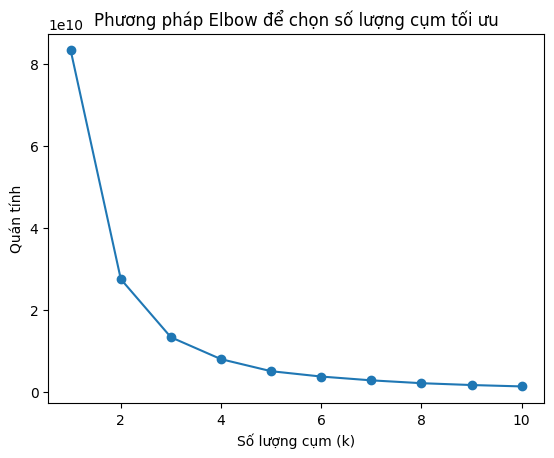

In [70]:
interation = elbow_k(train_df[['location_Đống Đa, Hà Nội', 'price']].values, max_itr)

Centers được tìm thấy sau 7 lần lặp:
[[5.40220820e-02 4.24984895e+03]
 [1.09308284e-01 1.19089222e+04]]


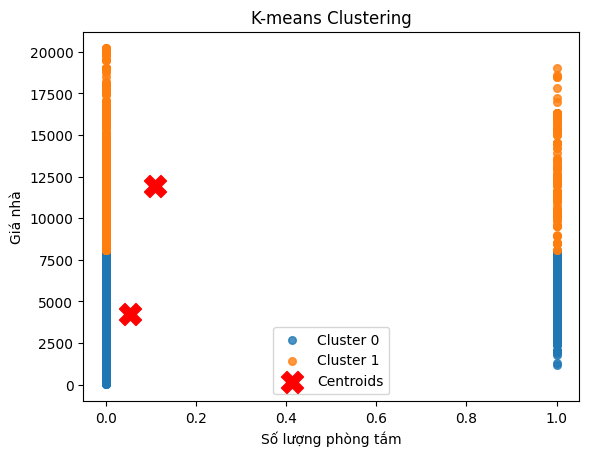

In [71]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['location_Đống Đa, Hà Nội', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Số lượng phòng tắm')
plt.ylabel('Giá nhà')
kmeans_display(train_df[['location_Đống Đa, Hà Nội', 'price']].values, labels[-1])

. Phân nhóm với hai biến đặc trưng 'area', 'price_per_metter' với giá nhà 'price' mục tiêu:

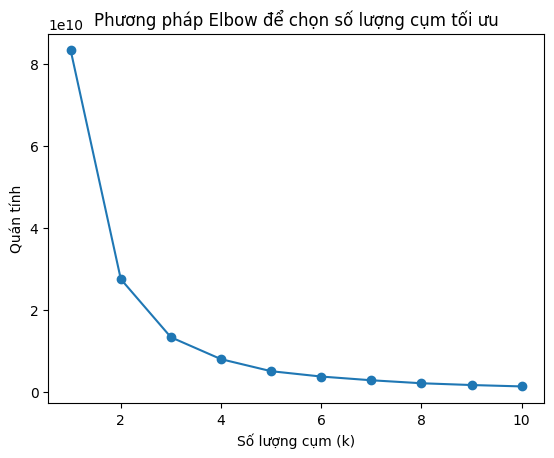

In [72]:
interation = elbow_k(train_df[['area', 'price_per_metter', 'price']].values, max_itr)

Centers được tìm thấy sau 12 lần lặp:
[[   53.22096074    90.80879306  4247.58451018]
 [   72.77836457   173.88225213 11899.12768118]]


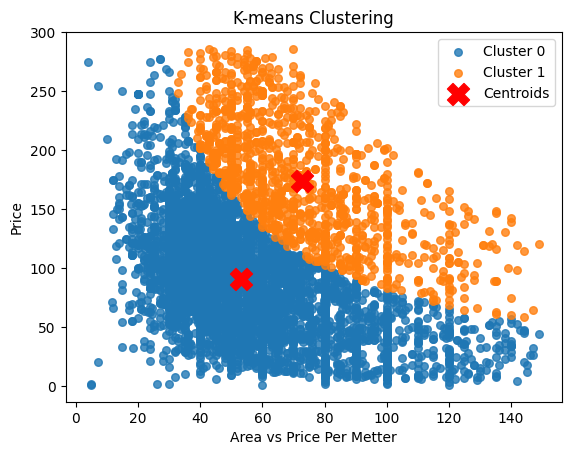

In [73]:
K = 2
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Centers được tìm thấy sau 12 lần lặp:
[[   78.27216174   190.85476516 14026.69826501]
 [   50.6883642     77.70986364  3296.33217393]
 [   61.01990177   130.04418861  7236.38847127]]


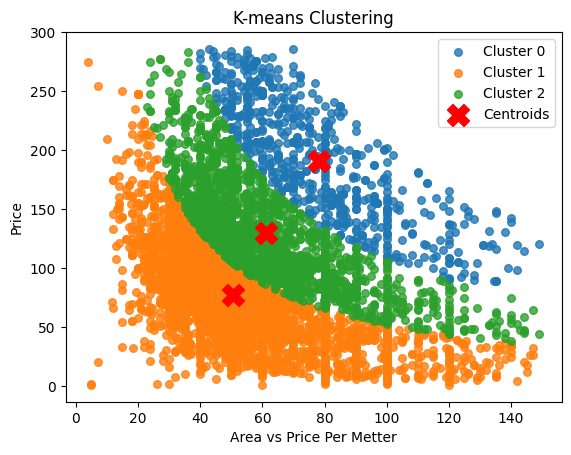

In [74]:
K = 3
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Centers được tìm thấy sau 6 lần lặp:
[[   80.49127789   196.27681947 14864.54886126]
 [   65.63496094   150.60299023  9044.64367764]
 [   50.30236467    66.458849    2684.71563993]
 [   54.97291318   110.2583561   5427.19159894]]


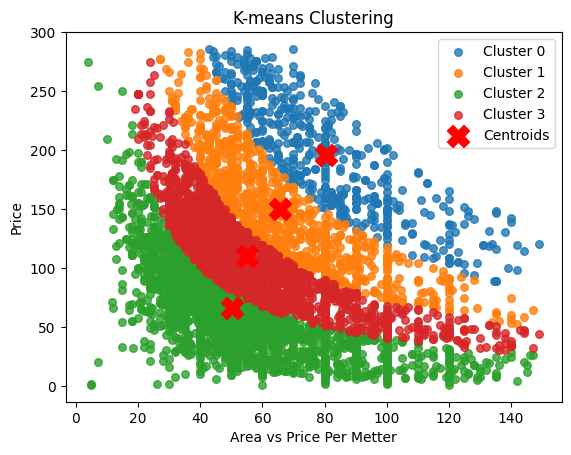

In [75]:
K = 4
interations = []
centers, labels, iterations = kmeans(train_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area vs Price Per Metter')
plt.ylabel('Price')
kmeans_display(train_df[['area', 'price_per_metter', 'price']].values, labels[-1])

. Với Area:

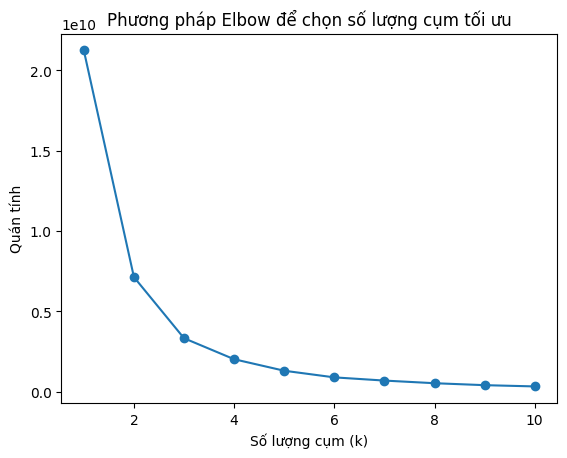

In [76]:
interation = elbow_k(test_df[['area', 'price']].values, max_itr)

Centers được tìm thấy sau 12 lần lặp:
[[   74.66891892 11945.24910135]
 [   53.62456487  4277.2846769 ]]


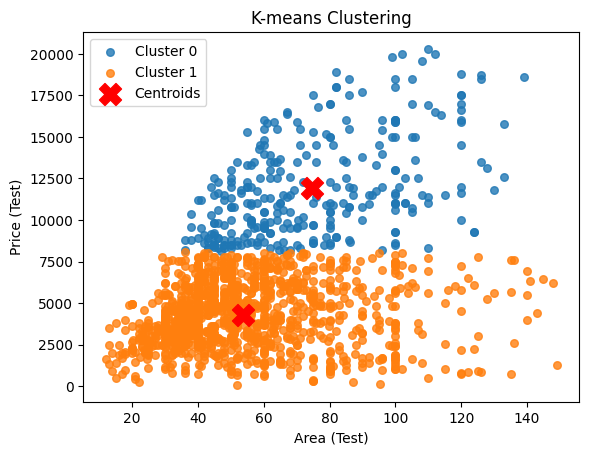

In [77]:
K = 2
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price']].values, labels[-1])

Centers được tìm thấy sau 13 lần lặp:
[[   49.92585995  3124.89927518]
 [   81.21458333 13524.10088333]
 [   60.74115523  6862.79094946]]


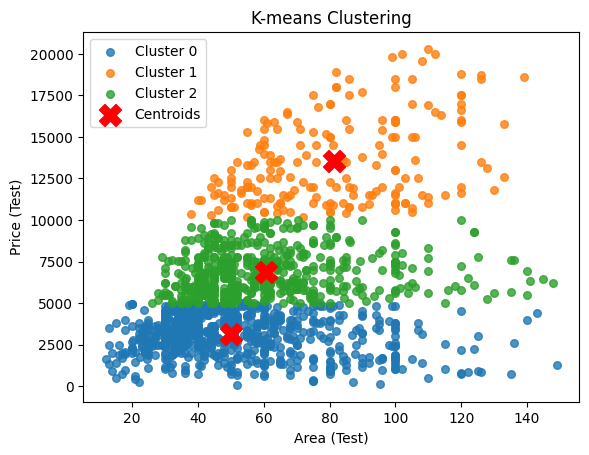

In [78]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Area (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price']].values, labels[-1])

. Với Price_Per_Metter:

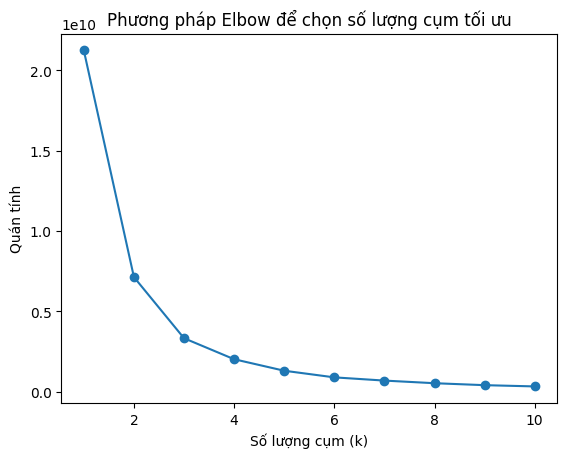

In [79]:
interation = elbow_k(test_df[['price_per_metter', 'price']].values, max_itr)

Centers được tìm thấy sau 13 lần lặp:
[[   76.31800983  3124.89927518]
 [  125.46417329  6862.79094946]
 [  177.79990625 13524.10088333]]


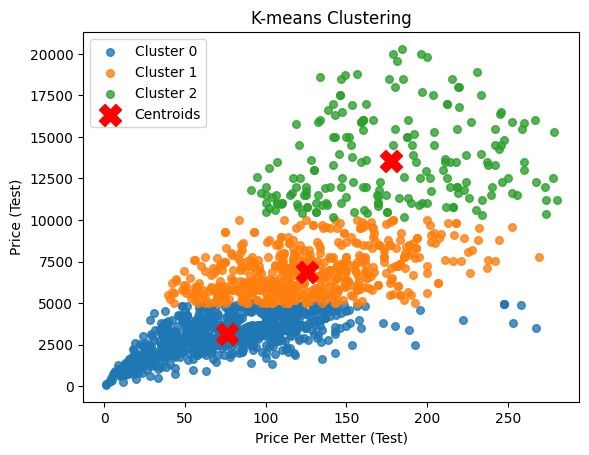

In [80]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['price_per_metter', 'price']].values, labels[-1])

. Với area, price_per_metter:

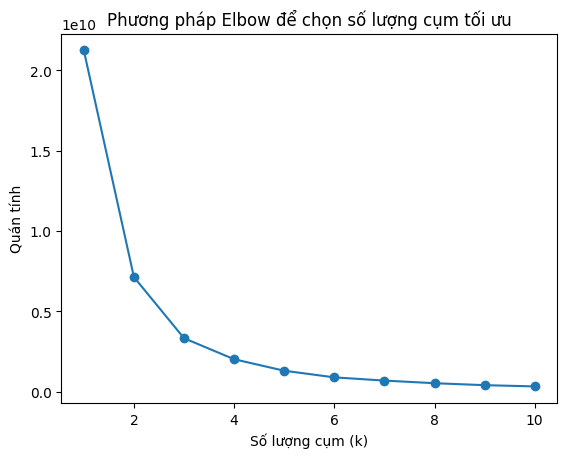

In [81]:
interation = elbow_k(test_df[['area', 'price_per_metter', 'price']].values, max_itr)

Centers được tìm thấy sau 12 lần lặp:
[[   81.21458333   177.79990625 13524.10088333]
 [   60.74115523   125.46417329  6862.79094946]
 [   49.92585995    76.31800983  3124.89927518]]


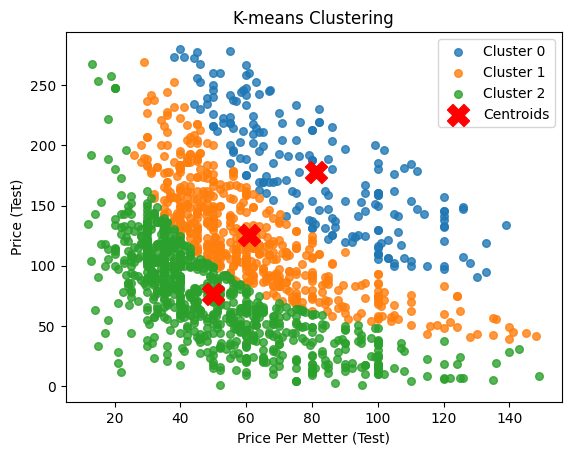

In [82]:
K = 3
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price_per_metter', 'price']].values, labels[-1])

Centers được tìm thấy sau 47 lần lặp:
[[   50.07848921    70.77744748  2851.11185612]
 [   88.07368421   187.78627368 15697.99868   ]
 [   57.99454225   116.16720423  6015.60755563]
 [   68.17326733   162.15148515 10161.30623465]]


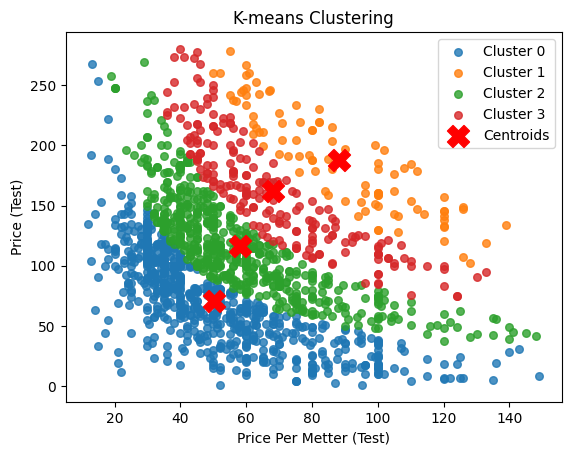

In [83]:
K = 4
interations = []
centers, labels, iterations = kmeans(test_df[['area', 'price_per_metter', 'price']].values, K)
print(f'Centers được tìm thấy sau {iterations} lần lặp:')
print(centers[-1])
plt.xlabel('Price Per Metter (Test)')
plt.ylabel('Price (Test)')
kmeans_display(test_df[['area', 'price_per_metter', 'price']].values, labels[-1])

### Về dự đoán giá nhà bằng cách sử dụng thuật toán Desicion Tree (ID3):
- Chia tập dữ liệu train, test:

In [84]:
data_encoded_refernce = data_encoded_refernce.sample(frac=1, random_state=42).reset_index(drop=True)

train_percentage = 0.8
num_train_samples = int(len(data_encoded_refernce) * train_percentage)

train_data = data_encoded_refernce.iloc[:num_train_samples, :]
test_data = data_encoded_refernce.iloc[num_train_samples:, :]

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']

X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

- Tiến hành định nghĩa các hàm xây dựng cây quyết định (ID3) và hiển thị giá nhà đã dự đoán:

In [85]:
class Node:
    def __init__(self, value=None, attribute=None, threshold=None, left=None, right=None):
        self.value = value
        self.attribute = attribute
        self.threshold = threshold
        self.left = left
        self.right = right

def calculate_entropy(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, attribute, threshold):
    mask = X[attribute] <= threshold
    y_left = y[mask]
    y_right = y[~mask]

    entropy_parent = calculate_entropy(y)
    entropy_left = calculate_entropy(y_left)
    entropy_right = calculate_entropy(y_right)

    num_left = len(y_left)
    num_right = len(y_right)
    num_total = len(y)

    information_gain = entropy_parent - (
        (num_left / num_total) * entropy_left + (num_right / num_total) * entropy_right
    )

    return information_gain

def find_best_split(X, y):
    best_information_gain = -1
    best_attribute = None
    best_threshold = None

    for attribute in X.columns:
        thresholds = np.unique(X[attribute])
        for threshold in thresholds:
            information_gain = calculate_information_gain(X, y, attribute, threshold)

            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_attribute = attribute
                best_threshold = threshold

    return best_attribute, best_threshold

def build_tree(X, y, max_depth=None, depth=0):
    if depth == max_depth or len(np.unique(y)) == 1:
        return Node(value=np.mean(y))

    best_attribute, best_threshold = find_best_split(X, y)

    if best_attribute is None:
        return Node(value=np.mean(y))

    mask = X[best_attribute] <= best_threshold
    X_left, y_left = X[mask], y[mask]
    X_right, y_right = X[~mask], y[~mask]

    left_child = build_tree(X_left, y_left, max_depth, depth + 1)
    right_child = build_tree(X_right, y_right, max_depth, depth + 1)

    return Node(attribute=best_attribute, threshold=best_threshold, left=left_child, right=right_child)

def predict_tree(node, x):
    if node.value is not None:
        return node.value

    if x[node.attribute] <= node.threshold:
        return predict_tree(node.left, x)
    else:
        return predict_tree(node.right, x)

max_depth = 10
tree_model = build_tree(X_train, y_train, max_depth=max_depth)

y_pred_tree = np.array([predict_tree(tree_model, x) for _, x in X_test.iterrows()])

In [86]:
print(f'Ta có {len(y_pred_tree)} giá trị về giá nhà sau khi dự đoán gồm những kết quả sau: \n', y_pred_tree)

Ta có 1561 giá trị về giá nhà sau khi dự đoán gồm những kết quả sau: 
 [16621.46464286  5074.95166667  2844.29828571 ...  2993.77827586
  5210.014      16487.58375   ]


- Đánh giá hiệu suất của mô hình dự đoán sau khi huấn luyện:

In [87]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n
    return mse

# Sử dụng hàm để tính MSE
mse_custom = mean_squared_error(y_test, y_pred_tree)

print(f'Mean Squared Error: {mse_custom}')
print(f'Root Mean Squared Error: {np.sqrt(mse_custom)}')
print(f'Mean Absolute Error: {np.mean(np.abs(y_test - y_pred_tree))}')

Mean Squared Error: 101907.60832010684
Root Mean Squared Error: 319.22971089813495
Mean Absolute Error: 184.43336176434215


- Độ chính xác của mô hình:

In [88]:
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Sử dụng hàm để tính R^2
r2 = r_squared(y_test, y_pred_tree)

print(f'R^2 Score: {r2}')

R^2 Score: 0.9925388162660768


- Vẽ biểu đồ scatter thể hiện giá nhà thực tế và giá nhà dự đoán:

In [89]:
px.scatter(x=y_test, y=y_pred_tree, title='Biểu đồ thể hiện giá nhà thực tế và giá nhà dự đoán được', labels={'x': 'Giá nhà thực tế', 'y': 'Giá nhà dự đoán được'})

. Đầu tiên, ta giả định rằng đường thẳng nó là dữ liệu tập kiểm thử:

In [90]:
y_line = y_test  

In [91]:
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_tree, 'Regression Line': y_line})
df

Actual Price  Predicted Price  Regression Line
6242      16500.00     16621.464643         16500.00
6243       5199.95      5074.951667          5199.95
6244       2850.05      2844.298286          2850.05
6245      14899.68     16666.531667         14899.68
6246       2600.00      2577.115714          2600.00
...            ...              ...              ...
7798       5299.70      5360.058000          5299.70
7799       3399.99      3340.092000          3399.99
7800       3000.00      2993.778276          3000.00
7801       5200.00      5210.014000          5200.00
7802      15500.16     16487.583750         15500.16

[1561 rows x 3 columns]

. Sau đó, vẽ lại biểu đồ xem lại mô hình coi đường hồi quy nó đi như thế nào với tập dữ liệu đã được huấn luyện:

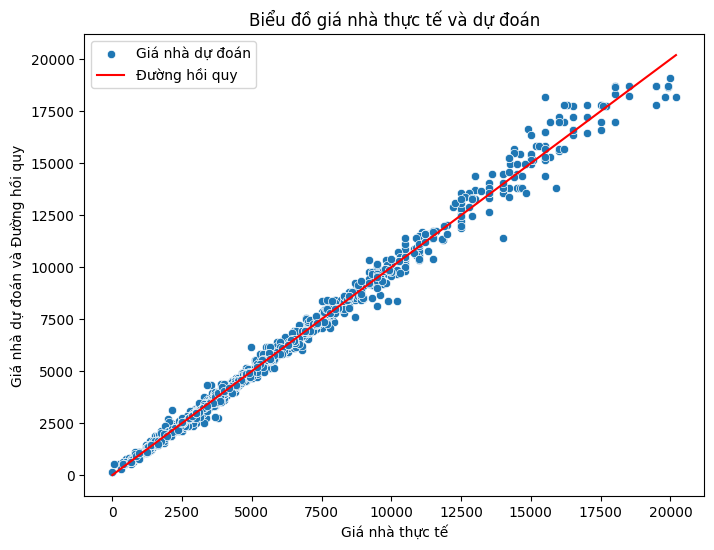

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=df, label='Giá nhà dự đoán')
sns.lineplot(x='Actual Price', y='Regression Line', data=df, color='red', label='Đường hồi quy')
plt.title('Biểu đồ giá nhà thực tế và dự đoán')
plt.xlabel('Giá nhà thực tế')
plt.ylabel('Giá nhà dự đoán và Đường hồi quy')
plt.legend()
plt.show()

- Vẽ biểu đồ thể hiện sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán:

In [93]:
px.histogram(x=y_test - y_pred_tree, title='Biểu đồ thể hiện sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán được', labels={'x': 'Sự chênh lệch giữa giá nhà thực tế và giá nhà dự đoán được'})